In [1]:
import pandas as pd
import numpy as np
from numpy import empty
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

C:\Users\34603\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\34603\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\34603\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\34603\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
C:\Users\34603\anaconda3\lib\site-packages\sklea

NameError: name 'ax' is not defined

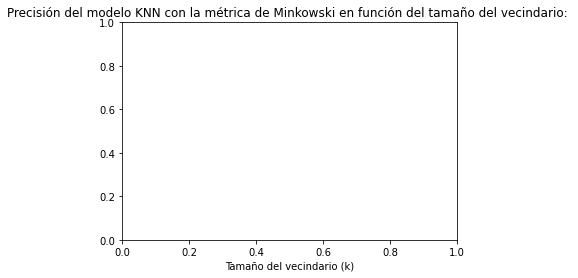

In [2]:
#Se establecen las variables
num_ciclistas = 21
num_variables= 66

#Se crean los distintos modelos de KNN según las métricas
modelosMinkowski = list()
modelosEuclidea= list()
modelosMahalanobis= list()

#Se crean las variaciones de modelos según el vecindario
for i in range(num_ciclistas):
    modelosMinkowski.append(KNeighborsClassifier(n_neighbors=i+1))
    modelosEuclidea.append(KNeighborsClassifier(n_neighbors=i+1, metric = 'euclidean'))
    modelosMahalanobis.append(KNeighborsClassifier(n_neighbors=i+1, metric = 'mahalanobis'))

#Se leen los datos 
ciclistas = open ('/Users/34603/Desktop/TFG/Python/ciclistasVariablesSinNormalizarNiNombres.txt','r')
dataSet = list()
labels = list()
for linea in ciclistas: #Recorremos cada linea del archivo
    caracteristicas = linea.split()
    clase = 1 if caracteristicas[0] == "Profesional" else 0
    labels.append(clase)
    variables = []
    for i in range(num_variables):
      variables.append(float(caracteristicas[i+1]))
    dataSet.append(variables)
#En dataSet están las listas de características de cada individuo
#En labels se encuentra la clase de cada individuo i en la posición i
dataSet=np.array(dataSet)
labels=np.array(labels)

#Se crean los conjuntos de entrenamiento y de testeo con "leave-one-out"
loo = LeaveOneOut()
loo.get_n_splits(dataSet)

#Se crean las listas de precisión de cada modelo
accuracyEucllidea = list()
accuracyMinkowski = list()
accuracyMahalanobis = list()
accuracyEucllideaNormalizada = list()

#Se aplica la estrategia "leave-one-out" para cada modelo
#Minkowski
for modelo in modelosMinkowski:
    precisionModelosMinkowski = list()
    for train_index, test_index in loo.split(dataSet):
        prediccion=modelo.fit(dataSet[train_index],labels[train_index]).predict(dataSet[test_index])
        if prediccion != labels[test_index]:
            precisionModelosMinkowski.append(0)
        else:
            precisionModelosMinkowski.append(1)
    accuracyMinkowski.append(sum(precisionModelosMinkowski)/len(precisionModelosMinkowski))

#Euclidea
for modelo in modelosEuclidea:
    precisionModelosEuclidea= list()
    for train_index, test_index in loo.split(dataSet):
        prediccion=modelo.fit(dataSet[train_index],labels[train_index]).predict(dataSet[test_index])
        if prediccion != labels[test_index]:
            precisionModelosEuclidea.append(0)
        else:
            precisionModelosEuclidea.append(1)
    accuracyEucllidea.append(sum(precisionModelosEuclidea)/len(precisionModelosEuclidea))

#Normalizamos los datos
mu=np.mean(dataSet,axis=0)
sigma=np.std(dataSet,axis=0)
dataSetNormalizad=((dataSet-mu)/sigma)
for modelo in modelosEuclidea:
    precisionModelosEuclideaNormalizados= list()
    for train_index, test_index in loo.split(dataSetNormalizad):
        prediccion=modelo.fit(dataSetNormalizad[train_index],labels[train_index]).predict(dataSetNormalizad[test_index])
        if prediccion != labels[test_index]:
            precisionModelosEuclideaNormalizados.append(0)
        else:
            precisionModelosEuclideaNormalizados.append(1)
    accuracyEucllideaNormalizada.append(sum(precisionModelosEuclideaNormalizados)/len(precisionModelosEuclideaNormalizados))

#Mahalanobis
for modelo in modelosMahalanobis:
    precisionModelosMahalanobis= list()
    for train_index, test_index in loo.split(dataSet):
        prediccion=modelo.fit(dataSet[train_index],labels[train_index]).predict(dataSet[test_index])
        if prediccion != labels[test_index]:
            precisionModelosMahalanobis.append(0)
        else:
            precisionModelosMahalanobis.append(1)
    accuracyMahalanobis.append(sum(precisionModelosMahalanobis)/len(precisionModelosMahalanobis))

#Se crean las gráficas de la precisión de cada modelo
#Minkowski
figMinkowski = plt.figure()
ax1 = figMinkowski.add_subplot(111)
 # Establecer título
ax1.set_title('Precisión del modelo KNN con la métrica de Minkowski en función del tamaño del vecindario: ')
 # Establecer etiquetas de eje X
plt.xlabel('Tamaño del vecindario (k)')
ax.set_xticks(range(0, 20))
 # Establecer etiqueta del eje Y
plt.ylabel('precisión')
K=np.linspace(1.0,21.0,21)
 # Dibujar diagrama de dispersión
ax1.scatter(K,accuracyMinkowski,c = 'r',marker = 'o' )
plt.legend()

#Euclidea
figEuclidea= plt.figure()
ax12 = figEuclidea.add_subplot(111)
 # Establecer título
ax12.set_title('Precisión del modelo KNN con la métrica Euclidea en función del tamaño del vecindario: ')
 # Establecer etiquetas de eje X
plt.xlabel('Tamaño del vecindario (k)')
ax.set_xticks(range(0, 20))
 # Establecer etiqueta del eje Y
plt.ylabel('precisión')
K=np.linspace(1.0,21.0,21)
 # Dibujar diagrama de dispersión
ax12.scatter(K,accuracyEucllidea,c = 'r',marker = 'o' )
plt.legend()

#EuclideaNormalizada
figEuclideaNormalizados= plt.figure()
ax122 = figEuclideaNormalizados.add_subplot(111)
 # Establecer título
ax122.set_title('Precisión del modelo KNN con la métrica Euclidea y los datos noralizados en función del tamaño del vecindario: ')
 # Establecer etiquetas de eje X
plt.xlabel('Tamaño del vecindario (k)')
ax.set_xticks(range(0, 20))
 # Establecer etiqueta del eje Y
plt.ylabel('precisión')
K=np.linspace(1.0,21.0,21)
 # Dibujar diagrama de dispersión
ax122.scatter(K,accuracyEucllideaNormalizada,c = 'r',marker = 'o' )
plt.legend()

#Mahalanobis
figMahalanobis = plt.figure()
ax13 = figMahalanobis.add_subplot(111)
 # Establecer título
ax13.set_title('Precisión del modelo KNN con la métrica de Mahalanobis en función del tamaño del vecindario: ')
 # Establecer etiquetas de eje X
plt.xlabel('Tamaño del vecindario (k)')
ax.set_xticks(range(0, 20))
 # Establecer etiqueta del eje Y
plt.ylabel('precisión')
K=np.linspace(1.0,21.0,21)
 # Dibujar diagrama de dispersión
ax13.scatter(K,accuracyMahalanobis,c = 'r',marker = 'o' )
plt.legend()

